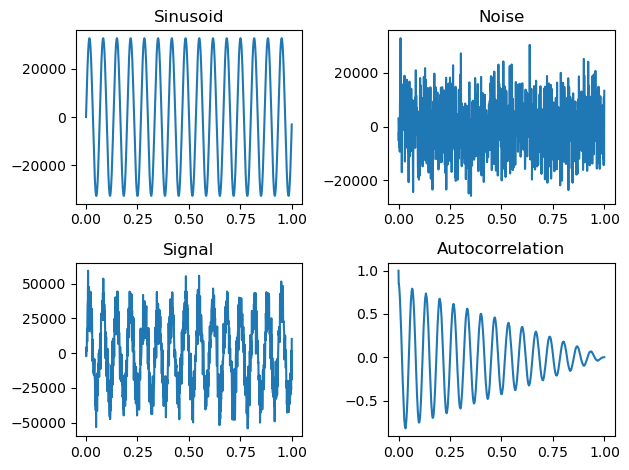

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


def normalise(x,MAX_INT16=32767):
    maxamp = max(x)
    amp = math.floor(MAX_INT16/maxamp)
    norm = np.zeros(len(x))
    for i in range(len(x)):
        norm[i] = amp*x[i]
    return norm


def genSine(a, f0, fs, dur):
    t = np.arange(dur)
    sinusoid = a*np.sin(2*np.pi*t*(f0/fs))
    sinusoid = normalise(sinusoid)
    return sinusoid


def genNoise(a, dur):
    noise = a*np.random.normal(0,1,dur)
    noise = normalise(noise)
    return noise


def autocorrelation(signal):
    mean = np.mean(signal)
    var = np.var(signal)
    norm_data = signal - mean
    acorr = np.correlate(norm_data, norm_data, 'full')[len(norm_data)-1:] 
    return acorr / var / len(norm_data)

fs = 1000
dur = 1*fs
tstep = 1 / fs
t = np.linspace(0, (dur-1)*tstep, dur) 
sinusoid = genSine(1,15,fs,dur)
noise = genNoise(5, dur)
signal = noise + sinusoid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(t, sinusoid)
ax1.set_title('Sinusoid')
ax2.plot(t, noise)
ax2.set_title('Noise')
ax3.plot(t, signal)
ax3.set_title('Signal')
ax4.plot(t, autocorrelation(signal))
ax4.set_title('Autocorrelation')
plt.tight_layout()